# Importación de las librerías necesarias

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,RocCurveDisplay
from sklearn import metrics


# 1. EDA

In [2]:
data = pd.read_csv('./heart_cleveland_upload.csv')
print(data.shape)
data.head()

(297, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


Variables numéricas y categóricas

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


Medidas de tendencia central para los datos

In [4]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Visualización gráfica de los datos

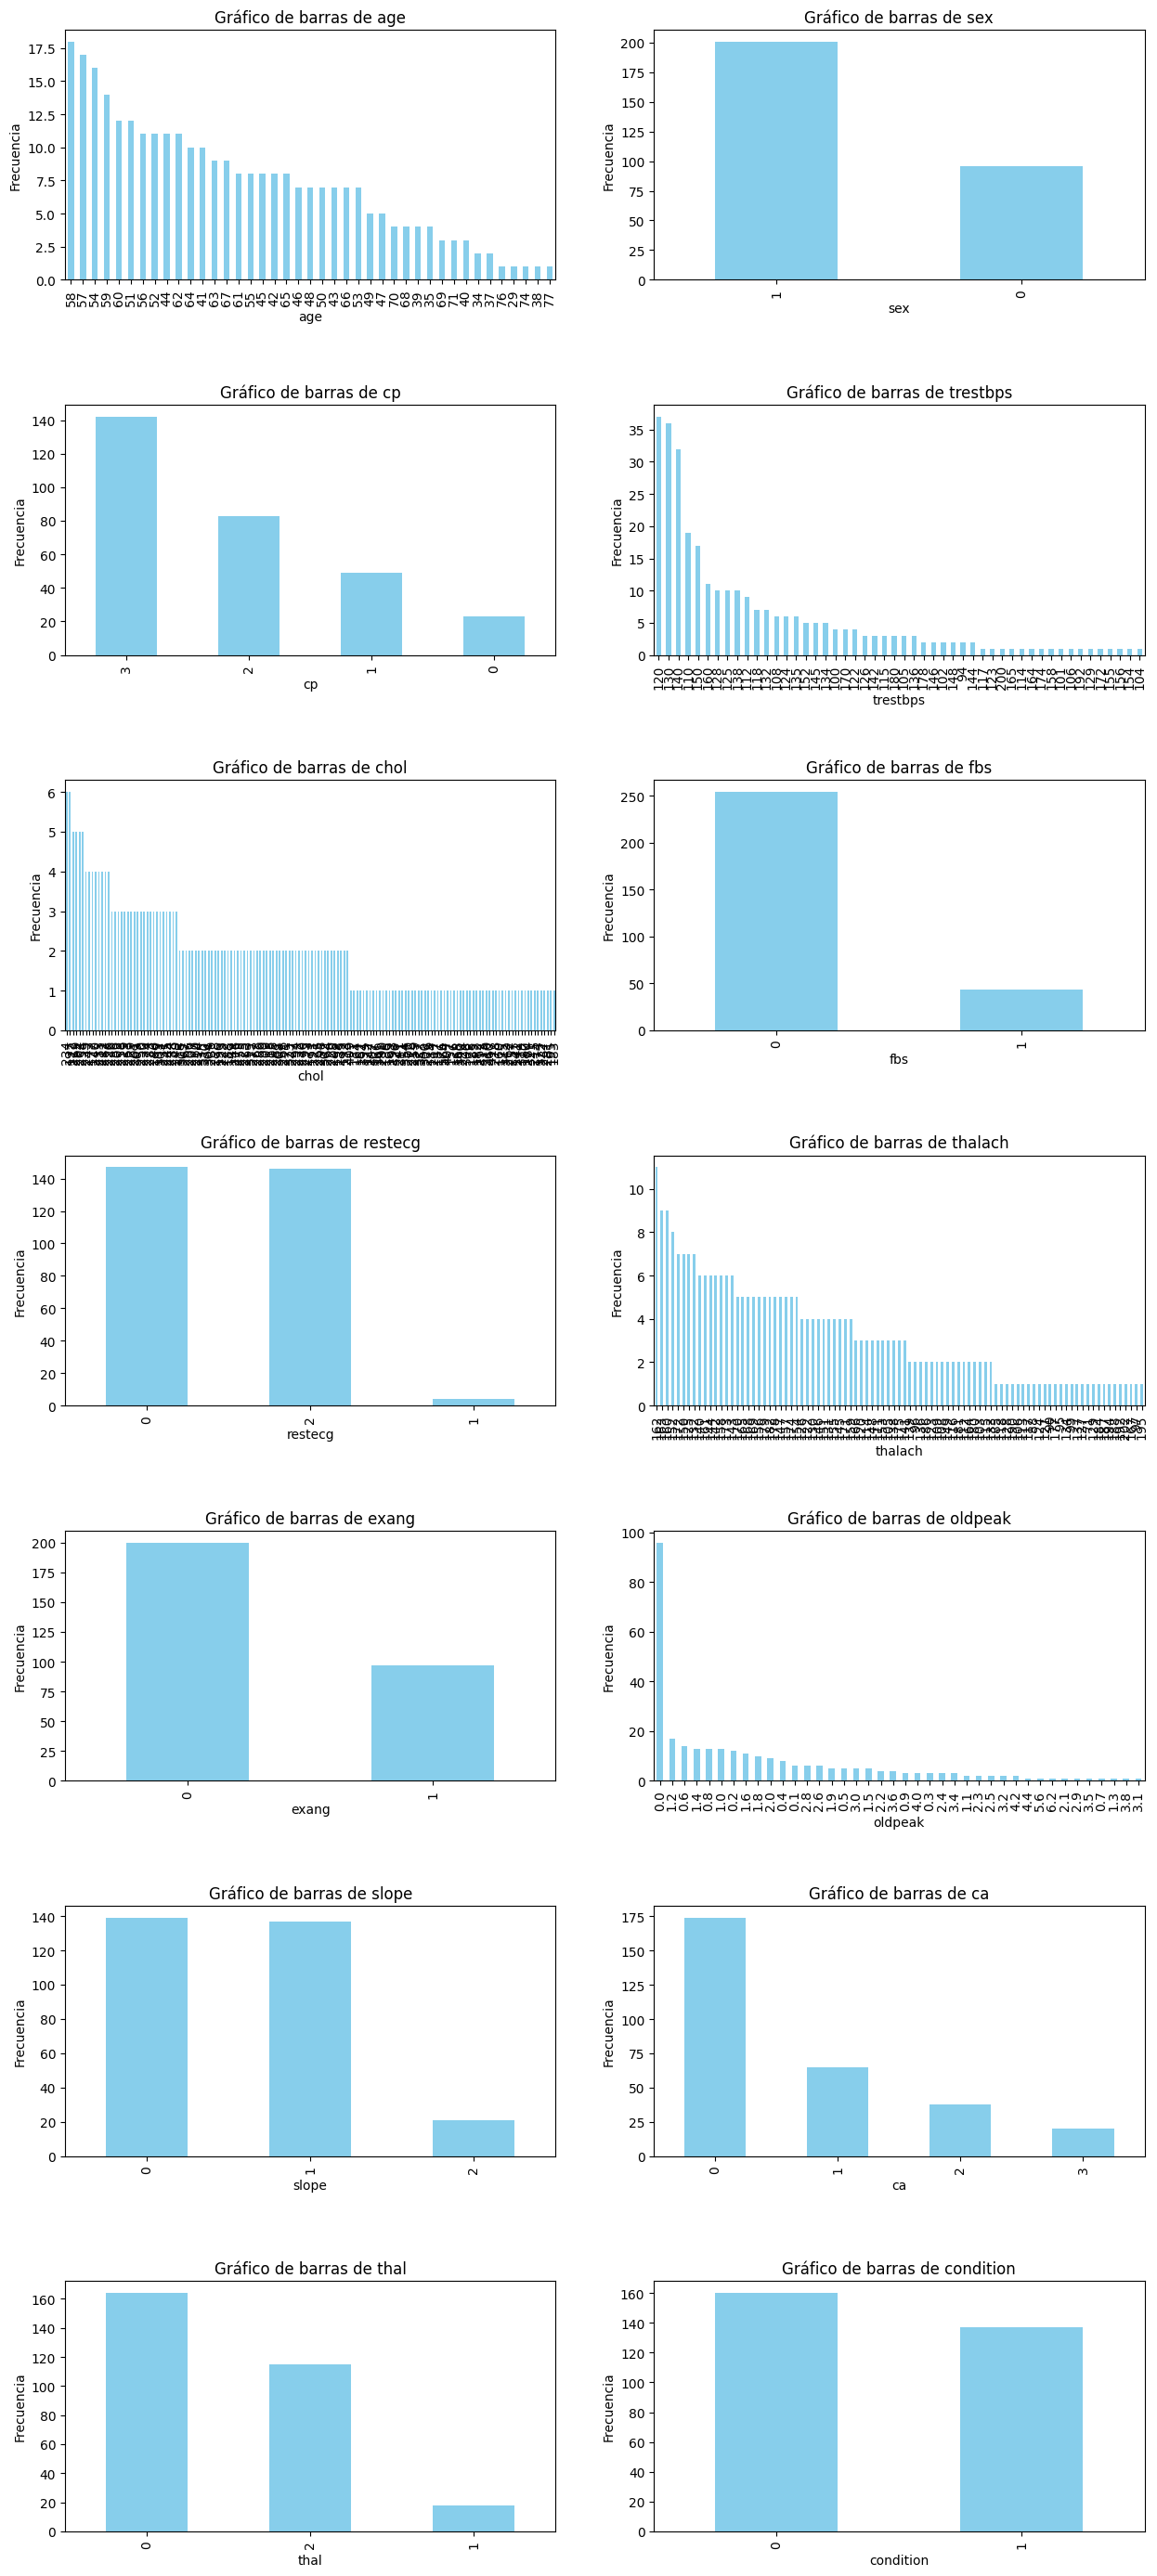

In [31]:
# Configuración de los gráficos
num_cols = len(data.columns)
num_rows = (num_cols + 1) // 2

# Crear una figura con subgráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))
plt.subplots_adjust(hspace=0.5)

# Iterar sobre las columnas y crear los gráficos de barras
for i, col in enumerate(data.columns):
    ax = axes[i//2, i%2]
    value_counts = data[col].value_counts()
    value_counts.plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(f'Gráfico de barras de {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frecuencia')

# Eliminar los gráficos vacíos si el número de columnas es impar
if num_cols % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

Verificación de valores nulos en el dataset

In [7]:
data.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

Identificación de valores atípicos

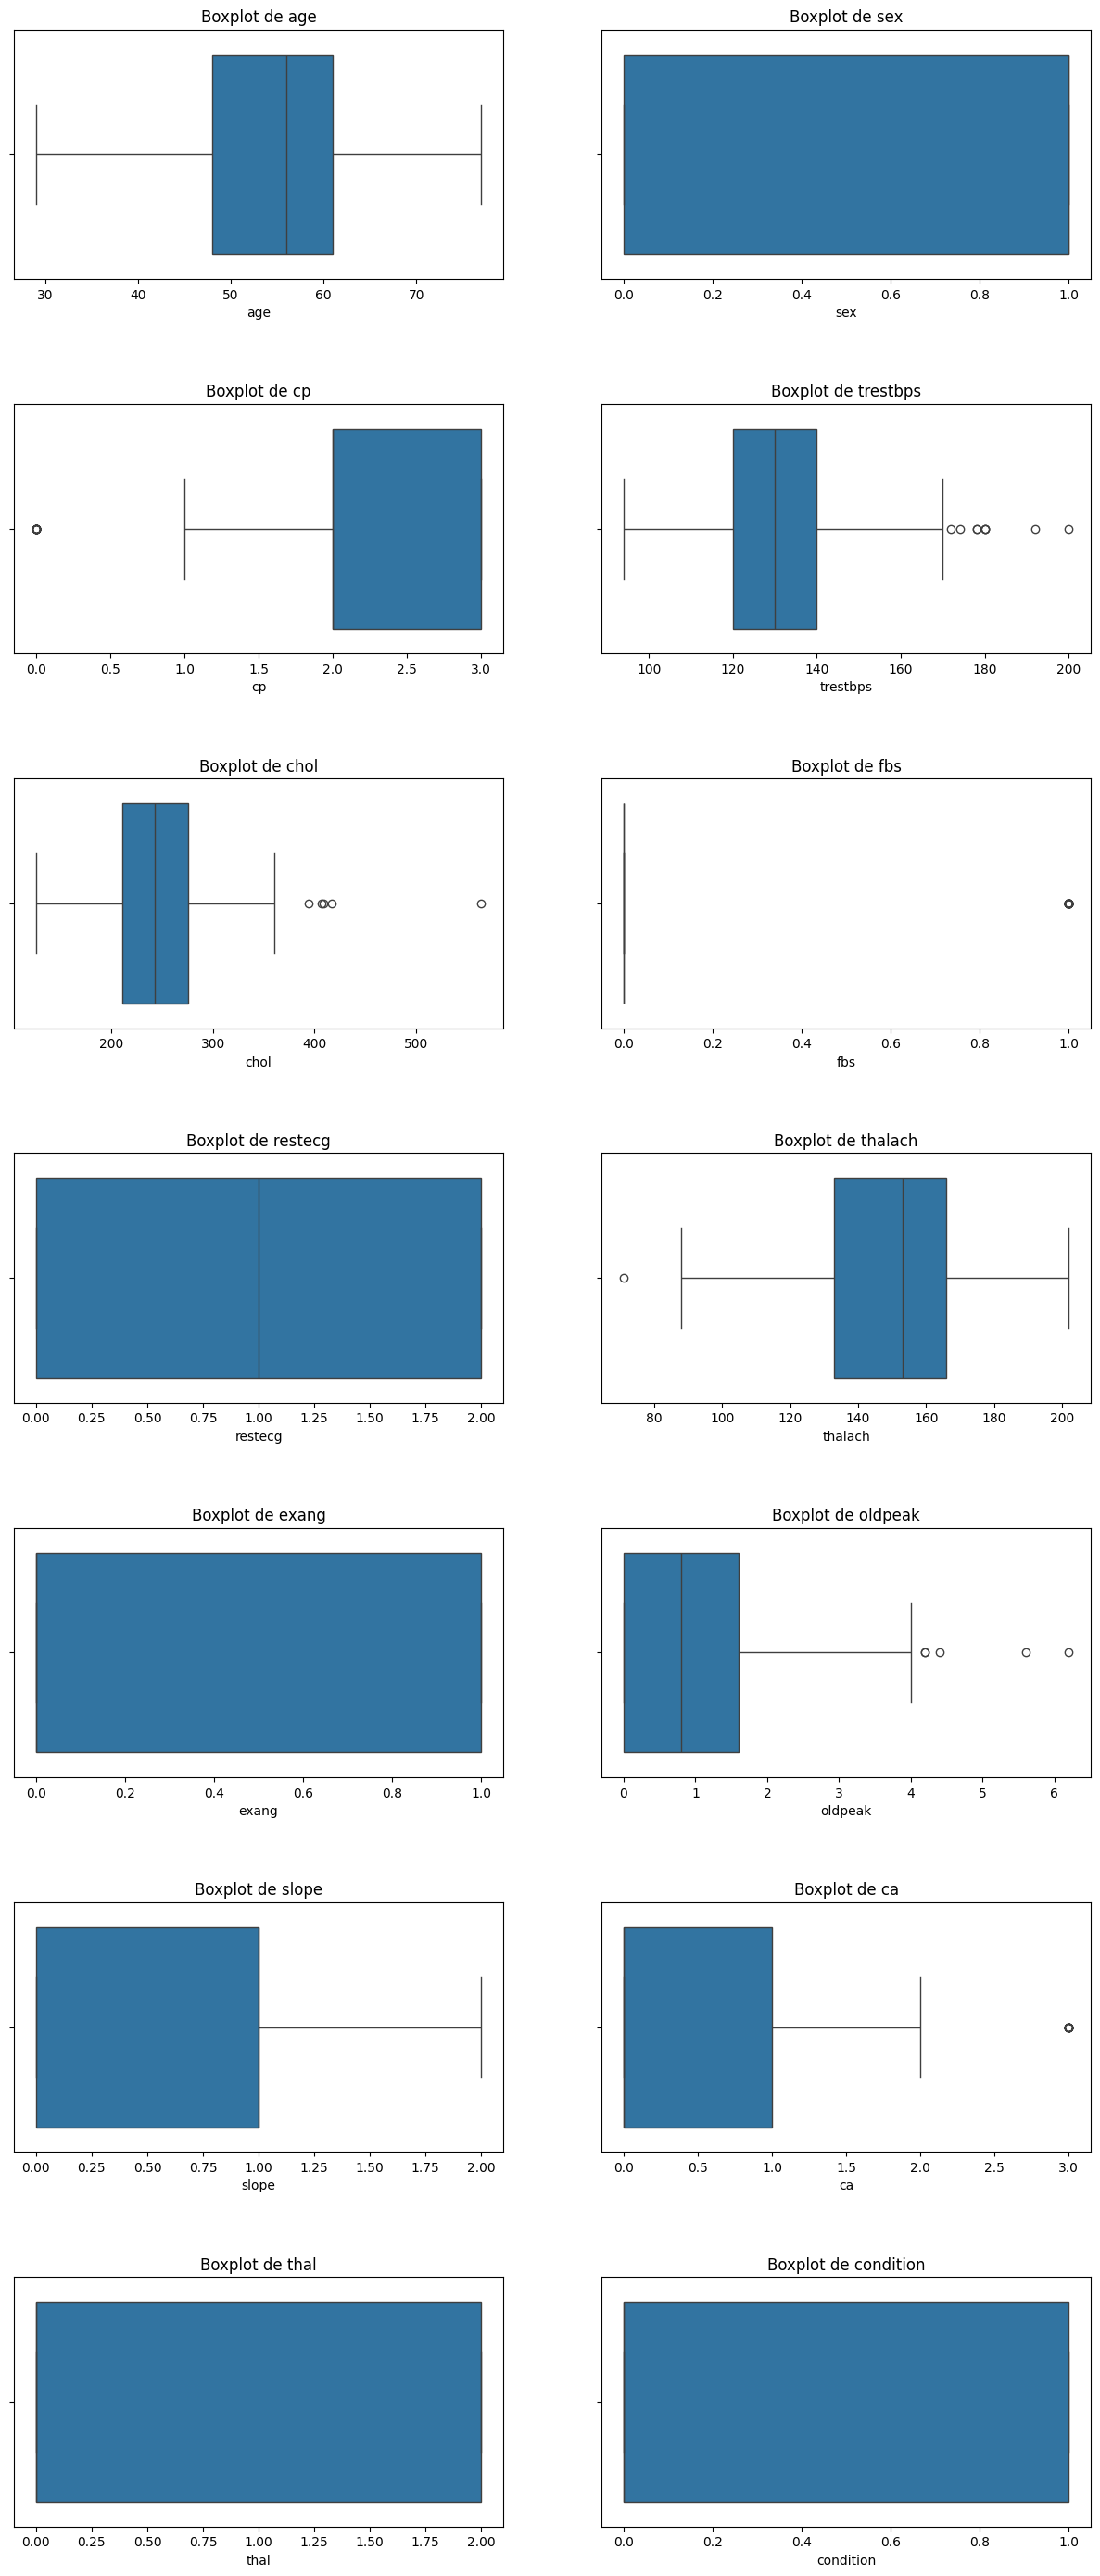

In [14]:
# Configuración de los gráficos
num_cols = len(data.columns)
num_rows = (num_cols + 1) // 2

# Creación de la figura con subgráficos
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 5*num_rows))
plt.subplots_adjust(hspace=0.5)

# Iteración sobre las columnas para crear los gráficos
for i, col in enumerate(data.columns):
    sns.boxplot(x=data[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Boxplot de {col}')

# Eliminación de los gráficos vacíos si el número de columnas es impar
if num_cols % 2 != 0:
    fig.delaxes(axes.flatten()[-1])

plt.show()

trestbps: aunque se tienen valores atípicos, estos se pueden dar en el caso real.

thalach: estos valores se encuentran en el rango normal.

oldpeak: aunque se tienen valores atípicos, estos se pueden dar en el caso real.

## 3. Seleccionar las características más relevantes para entrenar al modelo

- Característica de interés: condition

In [18]:
data['condition'].value_counts()
# 0 = no tiene enfermedad cardíaca
# 1 = tiene enfermedad cardíaca

condition
0    160
1    137
Name: count, dtype: int64

## 4. Dividir el dataset en test y train para evaluar correctamente el modelo

In [19]:
X = data.drop('condition',axis=1) #datos de train sin columna objetivo
Y = data['condition'] #data de la columna sellin_price

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25,stratify=Y, random_state=0)


In [20]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
234   56    0   3       200   288    1        2      133      1      4.0   
82    66    0   2       146   278    0        2      152      0      0.0   
36    56    1   1       120   240    0        0      169      0      0.0   
237   56    1   3       132   184    0        2      105      1      2.1   
133   47    1   2       108   243    0        0      152      0      0.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
291   40    1   3       110   167    0        2      114      1      2.0   
195   61    0   3       130   330    0        2      169      0      0.0   
170   65    0   3       150   225    0        2      114      0      1.0   
135   46    0   2       142   177    0        2      160      1      1.4   
293   39    1   3       118   219    0        0      140      0      1.2   

     slope  ca  thal  
234      2   2     2  
82       1   1     0  
36       2   0    

## 5. Entrenar el modelo configurando los hiperparámetros

In [21]:
logi_reg_model = LogisticRegression(solver='liblinear')

logi_reg_model.fit(X_train,Y_train)

prediccion =logi_reg_model.predict(X_test)

In [22]:
print(prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


## 6. Evaluar el desempeño del modelo en el conjunto Test con métricas como precisión, recall, F1-score, etc

In [24]:
print(classification_report(Y_test,prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



## 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.

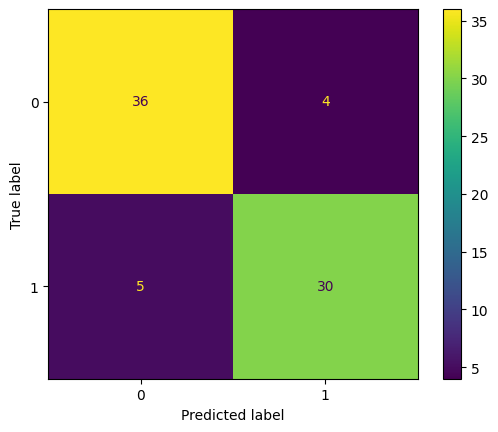

In [27]:
cm = confusion_matrix(Y_test,prediccion)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

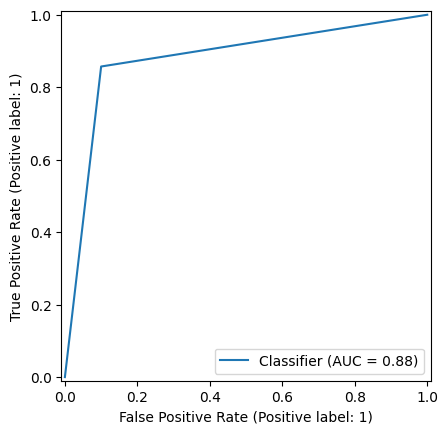

In [29]:
RocCurveDisplay.from_predictions(Y_test,prediccion)
plt.show()

## 8. Interpretar, analizar y documentar los resultados obtenidos.

**Precision:** este valor indica que la precisión **verdadera** para la clase 0 (no tinene enfermedad cardíaca) es del 88% mientras que para la clase 1 (si tiene enfermedad cardíaca) su precisión **verdadera** es de 88%.

**Recall:** este valor indica que el 90% de las instancias de la clase 0 (no tinene enfermedad cardíaca) han sido identificadas correctamente, mientras que el 86% de las instancias de la clase 1(si tinene enfermedad cardíaca) han sido identificadas correctamente.

**F1-score:** indica que la media armónica de la precisión y recall para la clase 0 es de 0.89, mientras que para 1 es de 0.87.

**Accuracy(exactitud):** indica que todas las instancias en el conjunto de datos de prueba han sido clasificados correctamente por el modelo.